In [2]:
import pandas as pd
import textwrap
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
summary_path = "../out/2025-12-15_15-08-48/split_summary_reasons.csv"
df = pd.read_csv(summary_path)
df

,accession,chromosome_path,plasmid_path,plasmid_reason,chromosome_reason
0,RS_GCF_010645065.1,/home/yasutake/research/projects/metagenome/da...,NaN,NaN,no_match
1,GB_GCA_036004205.1,/home/yasutake/research/projects/metagenome/da...,NaN,NaN,no_match
2,GB_GCA_934196075.1,/home/yasutake/research/projects/metagenome/da...,NaN,NaN,no_match
3,GB_GCA_018674025.1,/home/yasutake/research/projects/metagenome/da...,NaN,NaN,no_match
4,GB_GCA_030430655.1,/home/yasutake/research/projects/metagenome/da...,NaN,NaN,no_match
...,...,...,...,...,...
140277,GB_GCA_030668065.1,/home/yasutake/research/projects/metagenome/da...,NaN,NaN,no_match
140278,GB_GCA_009889605.1,/home/yasutake/research/projects/metagenome/da...,NaN,NaN,no_match
140279,GB_GCA_041305945.1,/home/yasutake/research/projects/metagenome/da...,NaN,NaN,no_match
140280,GB_GCA_030699205.1,/home/yasutake/research/projects/metagenome/da...,NaN,NaN,no_match


/tmp/ipykernel_3308541/1447324321.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reasons.values, y=top_reasons.index, ax=ax2, palette="viridis", orient='h')
/tmp/ipykernel_3308541/1447324321.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chrom_counts.values, y=chrom_counts.index, ax=ax3, palette="magma", orient='h')
/tmp/ipykernel_3308541/1447324321.py:50: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


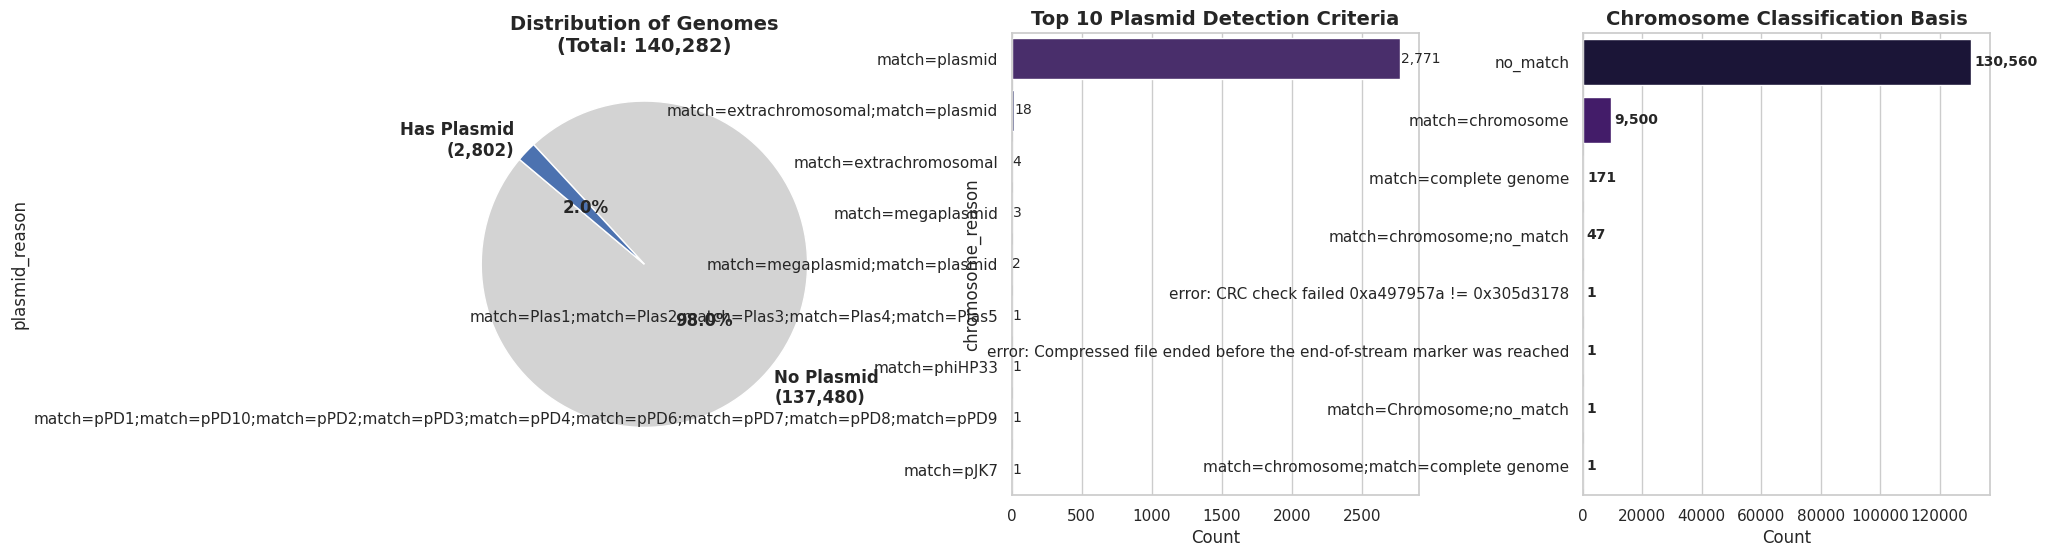

In [4]:
# 1. データの準備
df['has_plasmid'] = df['plasmid_path'].notna()
df_p = df[df['has_plasmid'] == True]

# --- Canvas設定 ---
# 横長にしてスペースを確保
fig = plt.figure(figsize=(20, 6))
gs = fig.add_gridspec(1, 3) # 1行3列のグリッド

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

plt.subplots_adjust(wspace=0.4) # グラフ間の隙間を広げる

# --- Plot 1: Genome Composition (円グラフ) ---
counts = df['has_plasmid'].value_counts()
labels = [f"No Plasmid\n({counts[False]:,})", f"Has Plasmid\n({counts[True]:,})"]
colors = ['#d3d3d3', '#4c72b0'] 

# テキスト位置の調整（pctdistanceなど）
ax1.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, 
        textprops={'fontsize': 12, 'weight': 'bold'}, pctdistance=0.5, labeldistance=1.1)
ax1.set_title(f"Distribution of Genomes\n(Total: {len(df):,})", fontsize=14, fontweight='bold')


# --- Plot 2: Plasmid Detection Reasons (横向き棒グラフ) ---
# 理由が長いので横向き(y軸に理由)にするのが定石
top_reasons = df_p['plasmid_reason'].value_counts().head(10)
sns.barplot(x=top_reasons.values, y=top_reasons.index, ax=ax2, palette="viridis", orient='h')

ax2.set_title("Top 10 Plasmid Detection Criteria", fontsize=14, fontweight='bold')
ax2.set_xlabel("Count")
# 数値をバーの右横に表示
for i, v in enumerate(top_reasons.values):
    ax2.text(v + 5, i, f"{v:,}", va='center', fontsize=10)


# --- Plot 3: Chromosome Classification Basis (横向き棒グラフ) ---
# ここが一番崩れていたので横向きに修正
chrom_counts = df['chromosome_reason'].value_counts()
sns.barplot(x=chrom_counts.values, y=chrom_counts.index, ax=ax3, palette="magma", orient='h')

ax3.set_title("Chromosome Classification Basis", fontsize=14, fontweight='bold')
ax3.set_xlabel("Count")
# 数値をバーの右横に表示
for i, v in enumerate(chrom_counts.values):
    ax3.text(v + (chrom_counts.max()*0.01), i, f"{v:,}", va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
# plt.savefig("../out/split_summary_visualization_fixed.png", dpi=300, bbox_inches='tight') # 保存
plt.show()

Original: 140282, After cleaning errors: 140280
Removed 2 corrupted records.


/tmp/ipykernel_3308541/4291756684.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reasons.values, y=top_reasons.index, ax=ax2, palette="viridis", orient='h')
/tmp/ipykernel_3308541/4291756684.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chrom_counts.values, y=chrom_counts.index, ax=ax3, palette="magma", orient='h')


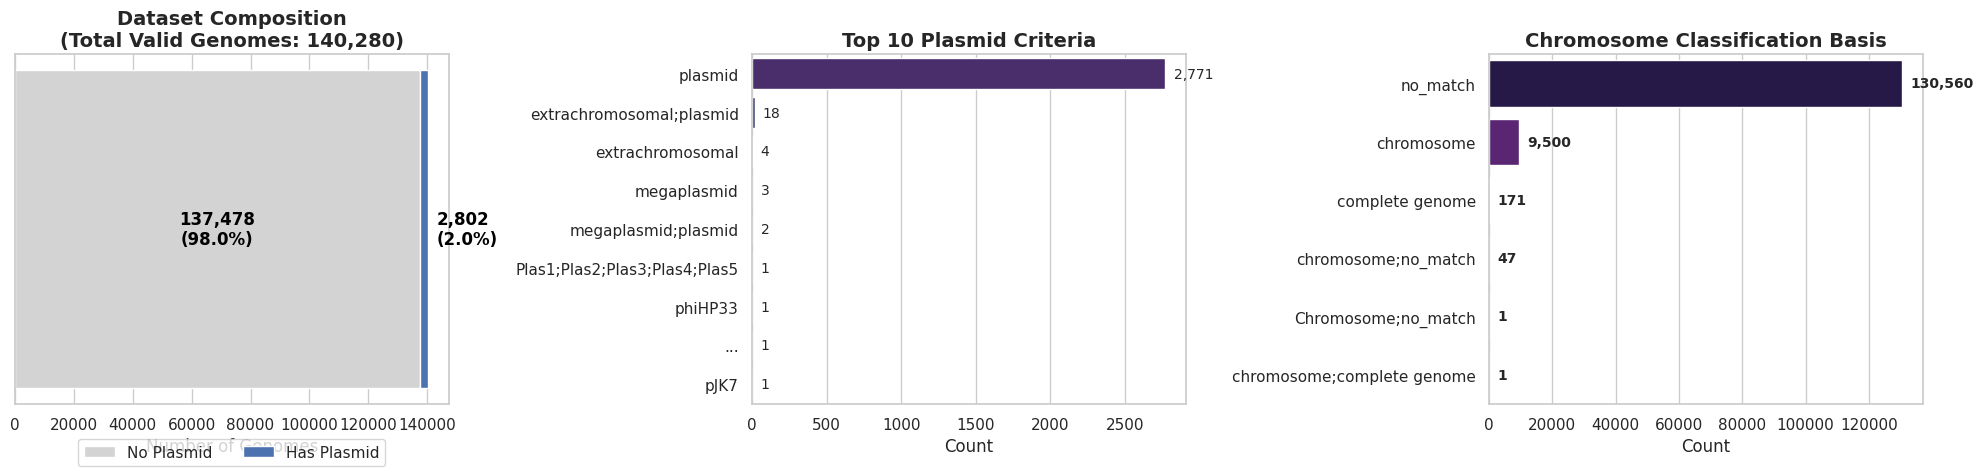

In [5]:
# --- 1. クリーニング（エラー除去） ---
# "error" という文字列が含まれる行を除外する
# これをやらないと学習時にクラッシュします
df_clean = df[~df['chromosome_reason'].astype(str).str.contains("error", case=False)].copy()

print(f"Original: {len(df)}, After cleaning errors: {len(df_clean)}")
print(f"Removed {len(df) - len(df_clean)} corrupted records.")

# --- 2. データ準備 ---
df_clean['has_plasmid'] = df_clean['plasmid_path'].notna()
df_p = df_clean[df_clean['has_plasmid'] == True].copy()

# ラベル短縮関数
def clean_label(text, width=40):
    if pd.isna(text): return "N/A"
    text = str(text).replace("match=", "")
    return textwrap.shorten(text, width=width, placeholder="...")

df_p['short_reason'] = df_p['plasmid_reason'].apply(clean_label)
df_clean['short_chrom_reason'] = df_clean['chromosome_reason'].apply(clean_label)

# --- 3. 描画設定 ---
sns.set(style="whitegrid")
fig = plt.figure(figsize=(20, 5)) # 少し高さを抑える
gs = fig.add_gridspec(1, 3) 
plt.subplots_adjust(wspace=0.3)

# --- Plot 1: Stacked Bar Chart (積み上げ棒グラフ) ---
ax1 = fig.add_subplot(gs[0, 0])

# 集計
counts = df_clean['has_plasmid'].value_counts()
n_no = counts.get(False, 0)
n_yes = counts.get(True, 0)
total = n_no + n_yes

# 積み上げ棒グラフの描画
# bar1: No Plasmid (下/左), bar2: Has Plasmid (上/右)
p1 = ax1.barh(0, n_no, color='#d3d3d3', label='No Plasmid', edgecolor='white', height=0.5)
p2 = ax1.barh(0, n_yes, left=n_no, color='#4c72b0', label='Has Plasmid', edgecolor='white', height=0.5)

# 見た目の調整
ax1.set_yticks([]) # Y軸の目盛りは不要
ax1.set_title(f"Dataset Composition\n(Total Valid Genomes: {total:,})", fontsize=14, fontweight='bold')
ax1.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)
ax1.set_xlabel("Number of Genomes")

# %と数のラベルを表示
# No Plasmid (真ん中あたりに)
ax1.text(n_no/2, 0, f"{n_no:,}\n({n_no/total*100:.1f}%)", ha='center', va='center', fontsize=12, fontweight='bold', color='black')
# Has Plasmid (バーの少し右か、中に入れる)
if n_yes / total > 0.05: # 5%以上なら中に入れる
    ax1.text(n_no + n_yes/2, 0, f"{n_yes:,}\n({n_yes/total*100:.1f}%)", ha='center', va='center', fontsize=12, fontweight='bold', color='white')
else: # 少なすぎる場合は右外に出す
    ax1.text(n_no + n_yes + (total*0.02), 0, f"{n_yes:,}\n({n_yes/total*100:.1f}%)", ha='left', va='center', fontsize=12, fontweight='bold', color='black')


# --- Plot 2: Plasmid Detection (横棒) ---
ax2 = fig.add_subplot(gs[0, 1])
top_reasons = df_p['short_reason'].value_counts()# .head(10)
sns.barplot(x=top_reasons.values, y=top_reasons.index, ax=ax2, palette="viridis", orient='h')

ax2.set_title("Top 10 Plasmid Criteria", fontsize=14, fontweight='bold')
ax2.set_xlabel("Count")
ax2.set_ylabel("")
for i, v in enumerate(top_reasons.values):
    ax2.text(v + (top_reasons.max()*0.02), i, f"{v:,}", va='center', fontsize=10)


# --- Plot 3: Chromosome Classification (横棒) ---
ax3 = fig.add_subplot(gs[0, 2])
# エラー除去後のデータで集計
chrom_counts = df_clean['short_chrom_reason'].value_counts()
sns.barplot(x=chrom_counts.values, y=chrom_counts.index, ax=ax3, palette="magma", orient='h')

ax3.set_title("Chromosome Classification Basis", fontsize=14, fontweight='bold')
ax3.set_xlabel("Count")
ax3.set_ylabel("")
for i, v in enumerate(chrom_counts.values):
    ax3.text(v + (chrom_counts.max()*0.02), i, f"{v:,}", va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
# plt.savefig("../out/split_summary_visualization_final.png", dpi=300, bbox_inches='tight')
plt.show()